In [1]:
# importing requierd libraries
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('bank-full.csv', sep=';')
print('Shape of our data {}'.format(data.shape))

Shape of our data (45211, 17)


In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = [x for x in data.columns.to_list() if x not in categorical]
numerical.remove('y')

In [7]:
print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Text(0.5, 0, 'Target class')

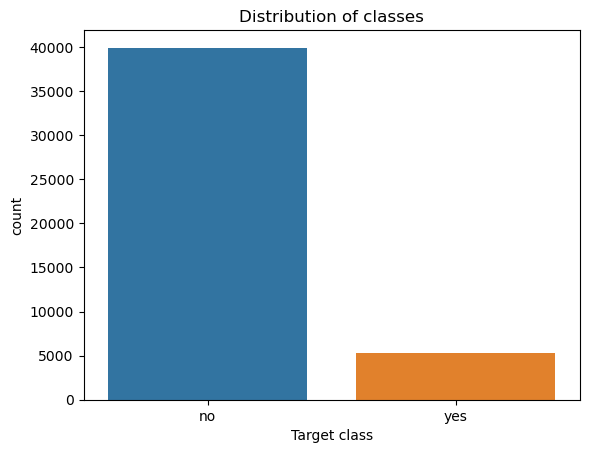

In [8]:
from matplotlib import pyplot as plt
sns.countplot(x=data['y'])
plt.title('Distribution of classes')
plt.xlabel('Target class')

In [9]:
data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Text(0.5, 0, 'y: target variable')

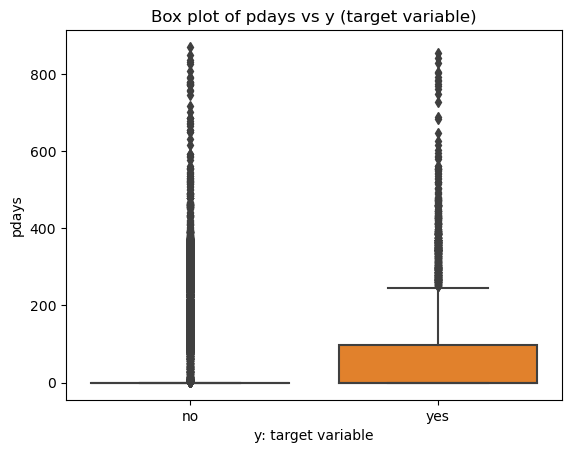

In [10]:
sns.boxplot(y=data['pdays'], x=data['y'])
plt.title('Box plot of pdays vs y (target variable)')
plt.xlabel('y: target variable')

Text(0.5, 1.0, 'PDF of pdays for target variable y')

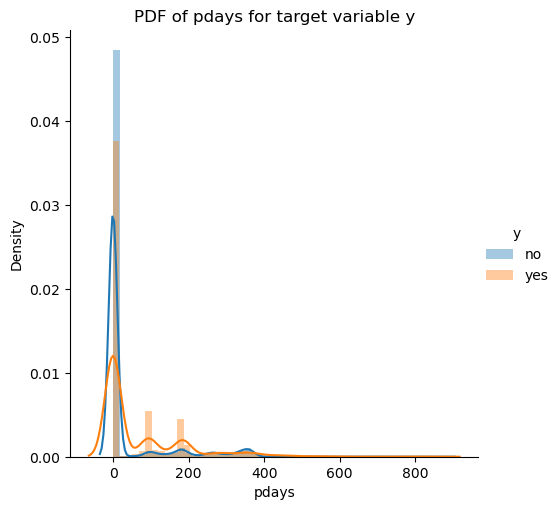

In [11]:
sns.FacetGrid(data, hue='y', size=5) \
.map(sns.distplot, 'pdays') \
.add_legend()
plt.title('PDF of pdays for target variable y')

In [12]:
data.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [13]:
for x in range(95, 101 , 1):
    print("{}% of pdays are less than equal to {}".format(x, data.pdays.quantile(x/100)))
iqr = data.pdays.quantile(0.75) - data.pdays.quantile(0.25)
print('IQR {}'.format(iqr))

95% of pdays are less than equal to 317.0
96% of pdays are less than equal to 337.0
97% of pdays are less than equal to 349.0
98% of pdays are less than equal to 360.0
99% of pdays are less than equal to 370.0
100% of pdays are less than equal to 871.0
IQR 0.0


Text(0.5, 0, 'y:target variable')

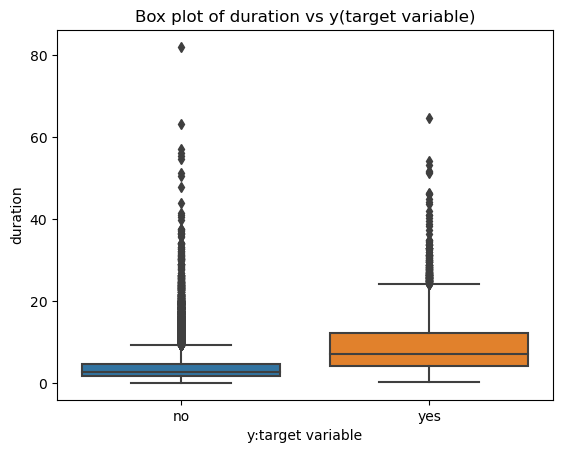

In [14]:
# converting call duration from seconds to minute
data['duration'] = data['duration']/60
sns.boxplot(y=data['duration'], x=data['y'])
plt.title('Box plot of duration vs y(target variable)')
plt.xlabel('y:target variable')

Text(0.5, 1.0, 'PDF of duration for target variable y')

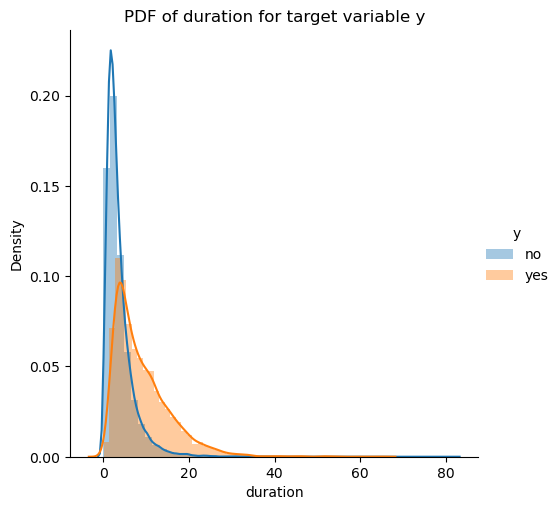

In [15]:
sns.FacetGrid(data, hue='y', size=5) \
.map(sns.distplot, 'duration') \
.add_legend()
plt.title('PDF of duration for target variable y')

In [16]:
data.duration.describe()

count    45211.000000
mean         4.302718
std          4.292130
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

In [17]:
for x in range(95, 101 , 1):
    print("{}% of calls have duration less than equal to {}".format(x, data.duration.quantile(x/100)))
iqr = data.duration.quantile(0.75) - data.duration.quantile(0.25)
print('IQR {}'.format(iqr))

95% of calls have duration less than equal to 12.516666666666667
96% of calls have duration less than equal to 13.716666666666667
97% of calls have duration less than equal to 15.244999999999951
98% of calls have duration less than equal to 17.516666666666666
99% of calls have duration less than equal to 21.15
100% of calls have duration less than equal to 81.96666666666667
IQR 3.5999999999999996


Text(0.5, 0, 'y:target variable')

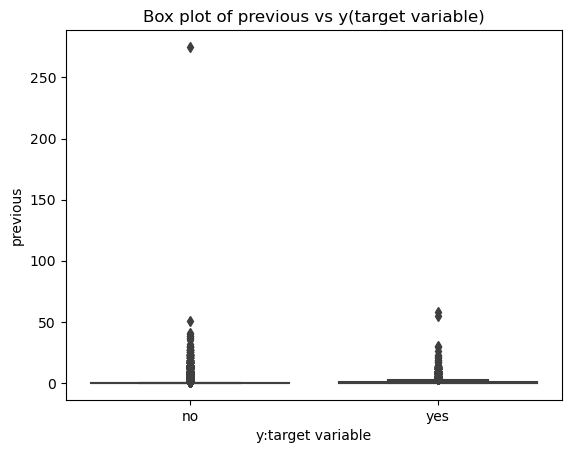

In [18]:
sns.boxplot(y=data['previous'], x=data['y'])
plt.title('Box plot of previous vs y(target variable)')
plt.xlabel('y:target variable')

Text(0.5, 1.0, 'PDF of previous values for target variable y')

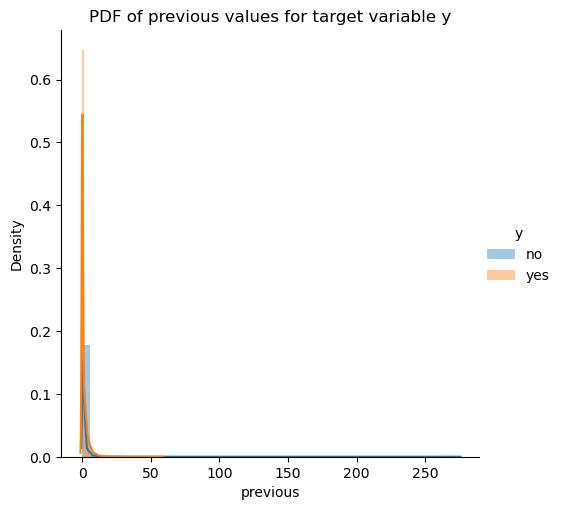

In [19]:
sns.FacetGrid(data, hue='y', size=5) \
.map(sns.distplot, 'previous') \
.add_legend()
plt.title('PDF of previous values for target variable y')

In [20]:
data.previous.describe()


count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [21]:
for x in range(95, 101 , 1):
    print("{}% of previous values less than equal to {}".format(x, data.previous.quantile(x/100)))
iqr = data.previous.quantile(0.75) - data.previous.quantile(0.25)
print('IQR {}'.format(iqr))

95% of previous values less than equal to 3.0
96% of previous values less than equal to 4.0
97% of previous values less than equal to 5.0
98% of previous values less than equal to 6.0
99% of previous values less than equal to 8.900000000001455
100% of previous values less than equal to 275.0
IQR 0.0


Text(0.5, 0, 'y:target variable')

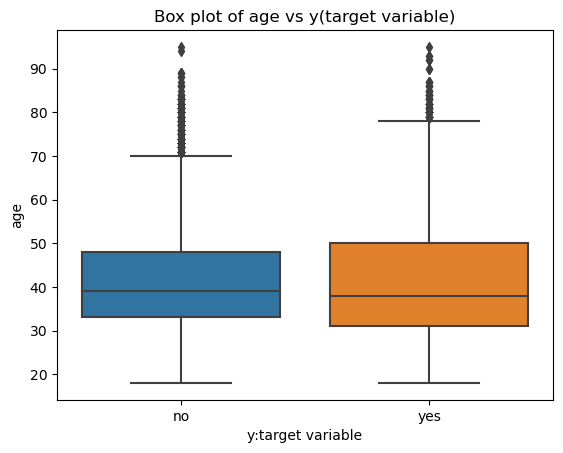

In [22]:
sns.boxplot(y=data['age'], x=data['y'])
plt.title('Box plot of age vs y(target variable)')
plt.xlabel('y:target variable')

Text(0.5, 1.0, 'PDF of age for target variable y')

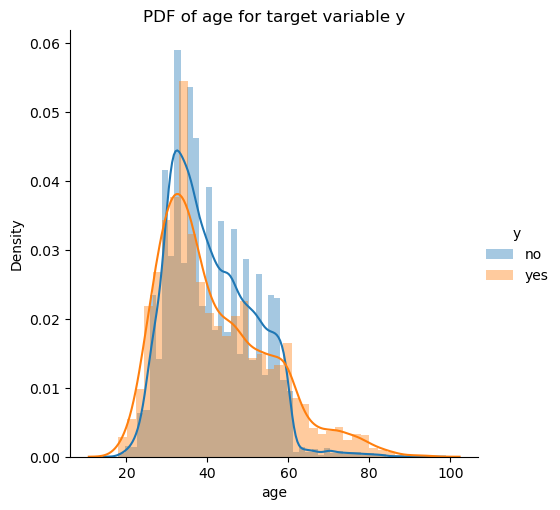

In [23]:
sns.FacetGrid(data, hue='y', size=5) \
.map(sns.distplot, 'age') \
.add_legend()
plt.title('PDF of age for target variable y')

In [24]:
data.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [25]:
for x in range(95, 101 , 1):
    print("{}% of people having age are less than equal to {}".format(x, data.age.quantile(x/100)))
iqr = data.age.quantile(0.75) - data.age.quantile(0.25)
print('IQR {}'.format(iqr))

95% of people having age are less than equal to 59.0
96% of people having age are less than equal to 59.0
97% of people having age are less than equal to 60.0
98% of people having age are less than equal to 63.0
99% of people having age are less than equal to 71.0
100% of people having age are less than equal to 95.0
IQR 15.0


In [26]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [27]:
count_age_response_pct = pd.crosstab(data['y'],data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

<AxesSubplot:xlabel='age_group', ylabel='count'>

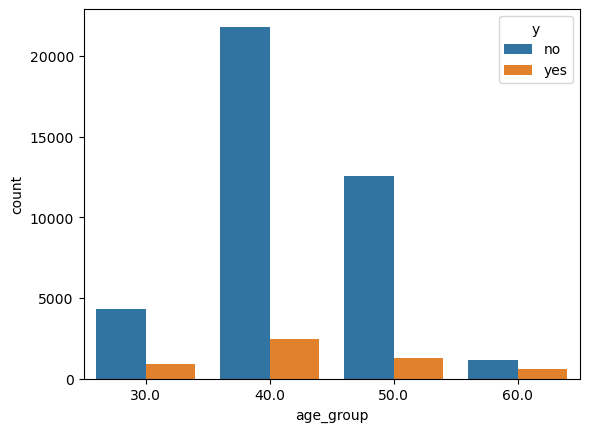

In [28]:
sns.countplot(x='age_group', data=data, hue='y')

In [29]:
print('Success rate and total clients contacted for different age_groups:')
print('Clients age < 30 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 30]), data[data['age_group'] == 30].y.value_counts()[1]/len(data[data['age_group'] == 30])))
print('Clients of age 30-45 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 40]), data[data['age_group'] == 40].y.value_counts()[1]/len(data[data['age_group'] == 40])))
print('Clients of age 40-60 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 50]), data[data['age_group'] == 50].y.value_counts()[1]/len(data[data['age_group'] == 50])))
print('Clients of 60+ age contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 60]), data[data['age_group'] == 60].y.value_counts()[1]/len(data[data['age_group'] == 60])))

Success rate and total clients contacted for different age_groups:
Clients age < 30 contacted: 5273, Success rate: 0.1759908970225678
Clients of age 30-45 contacted: 24274, Success rate: 0.10117821537447474
Clients of age 40-60 contacted: 13880, Success rate: 0.09402017291066282
Clients of 60+ age contacted: 1784, Success rate: 0.336322869955157


In [30]:
data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Text(0.5, 1.0, 'Count Plot of job for target variable')

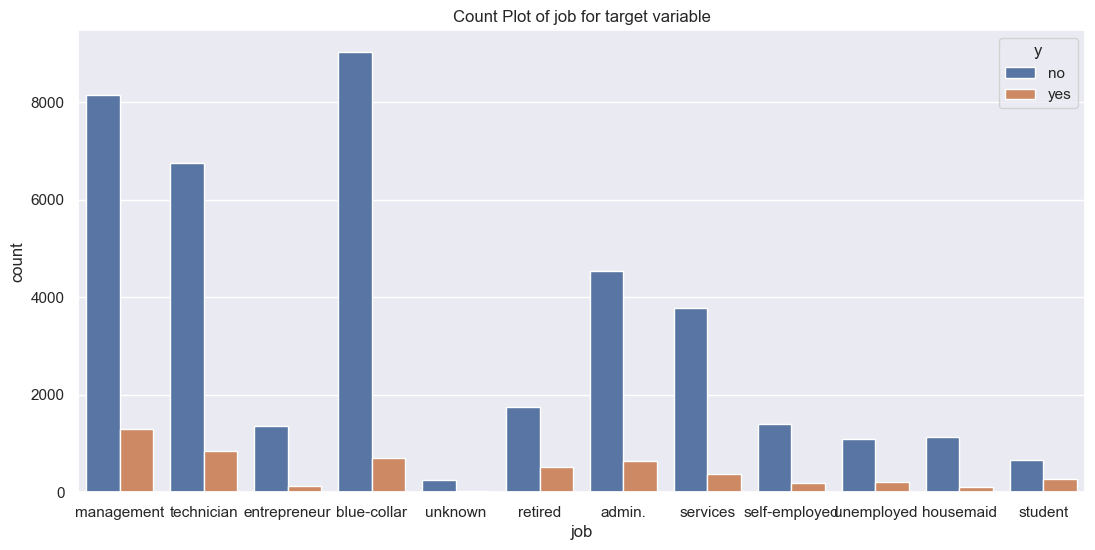

In [31]:
sns.set(rc={'figure.figsize':(13,6)})
sns.countplot(x=data['job'], data=data, hue=data['y'])
plt.title('Count Plot of job for target variable')

In [32]:
table = PrettyTable(['Job', 'Total Clients', 'Success rate'])
table.add_row(['Blue-collar', len(data[data['job'] == 'blue-collar']), data[data['job'] == 'blue-collar'].y.value_counts()[1]/len(data[data['job'] == 'blue-collar'])])
table.add_row(['Management', len(data[data['job'] == 'management']), data[data['job'] == 'management'].y.value_counts()[1]/len(data[data['job'] == 'management'])])
table.add_row(['Technician', len(data[data['job'] == 'technician']), data[data['job'] == 'technician'].y.value_counts()[1]/len(data[data['job'] == 'technician'])])
table.add_row(['Admin', len(data[data['job'] == 'admin.']), data[data['job'] == 'admin.'].y.value_counts()[1]/len(data[data['job'] == 'admin.'])])
table.add_row(['Services', len(data[data['job'] == 'services']), data[data['job'] == 'services'].y.value_counts()[1]/len(data[data['job'] == 'services'])])
table.add_row(['Retired', len(data[data['job'] == 'retired']), data[data['job'] == 'retired'].y.value_counts()[1]/len(data[data['job'] == 'retired'])])
table.add_row(['Self-employed', len(data[data['job'] == 'self-employed']), data[data['job'] == 'self-employed'].y.value_counts()[1]/len(data[data['job'] == 'self-employed'])])
table.add_row(['Entrepreneur', len(data[data['job'] == 'entrepreneur']), data[data['job'] == 'entrepreneur'].y.value_counts()[1]/len(data[data['job'] == 'entrepreneur'])])
table.add_row(['Unemployed', len(data[data['job'] == 'unemployed']), data[data['job'] == 'unemployed'].y.value_counts()[1]/len(data[data['job'] == 'unemployed'])])
table.add_row(['Housemaid', len(data[data['job'] == 'housemaid']), data[data['job'] == 'housemaid'].y.value_counts()[1]/len(data[data['job'] == 'housemaid'])])
table.add_row(['Student', len(data[data['job'] == 'student']), data[data['job'] == 'student'].y.value_counts()[1]/len(data[data['job'] == 'student'])])
table.add_row(['Unknown', len(data[data['job'] == 'unknown']), data[data['job'] == 'unknown'].y.value_counts()[1]/len(data[data['job'] == 'unknown'])])
print(table)

+---------------+---------------+---------------------+
|      Job      | Total Clients |     Success rate    |
+---------------+---------------+---------------------+
|  Blue-collar  |      9732     | 0.07274969173859433 |
|   Management  |      9458     | 0.13755550856417847 |
|   Technician  |      7597     | 0.11056996182703699 |
|     Admin     |      5171     | 0.12202668729452718 |
|    Services   |      4154     | 0.08883004333172845 |
|    Retired    |      2264     | 0.22791519434628976 |
| Self-employed |      1579     | 0.11842938568714376 |
|  Entrepreneur |      1487     | 0.08271687962340282 |
|   Unemployed  |      1303     | 0.15502686108979277 |
|   Housemaid   |      1240     | 0.08790322580645162 |
|    Student    |      938      |  0.2867803837953092 |
|    Unknown    |      288      | 0.11805555555555555 |
+---------------+---------------+---------------------+


In [33]:
data.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

Text(0.5, 1.0, 'Count Plot of poutcome for target variable')

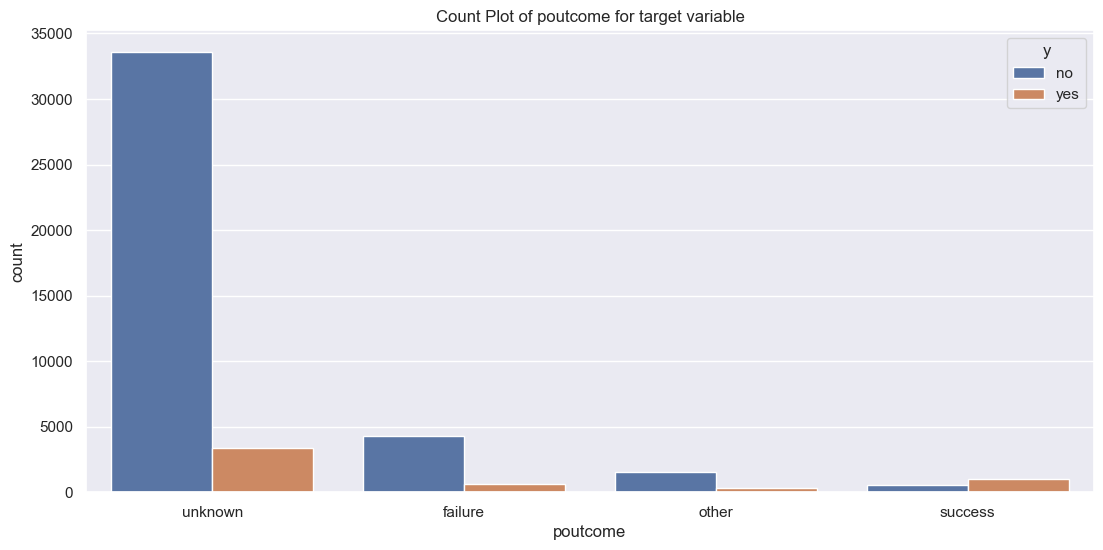

In [34]:
sns.countplot(x=data['poutcome'], data=data, hue=data['y'])
plt.title('Count Plot of poutcome for target variable')

In [35]:
data.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Text(0.5, 1.0, 'Count plot of education for target variable y')

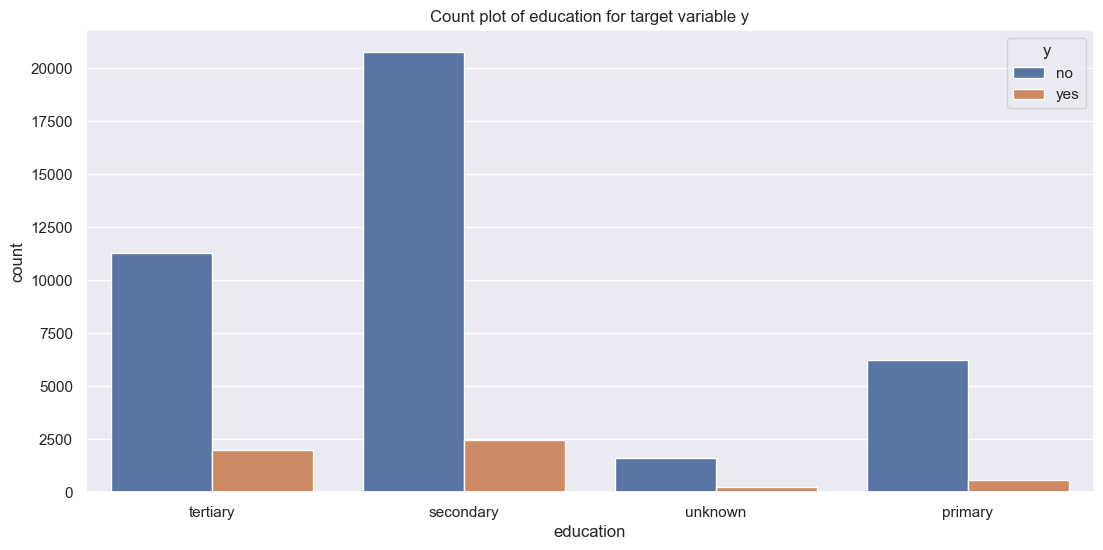

In [36]:
sns.countplot(x=data['education'], data=data, hue=data['y'])
plt.title('Count plot of education for target variable y')

In [37]:
data.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

Text(0.5, 1.0, 'Count plot of default for target variable y')

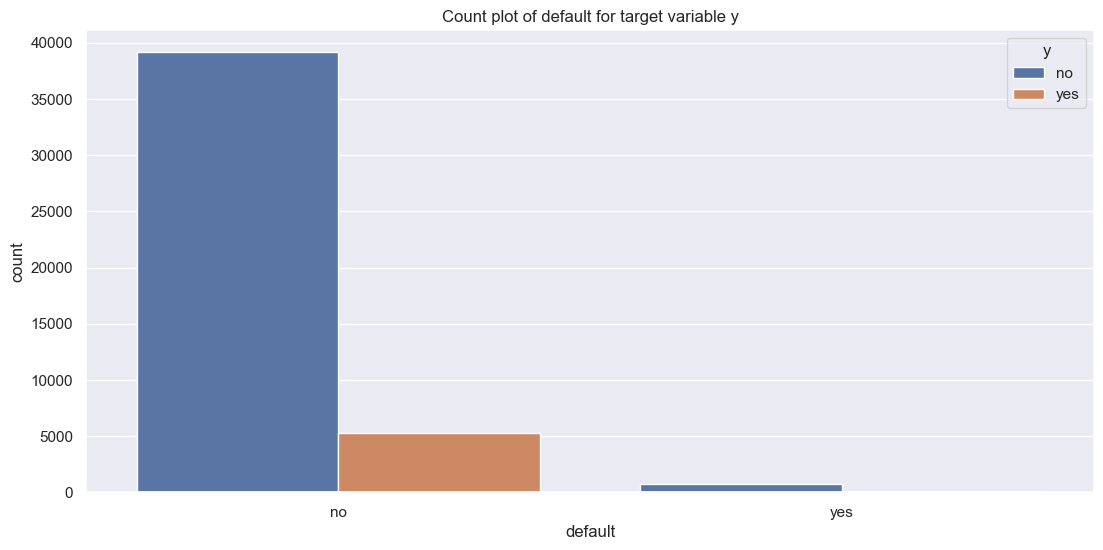

In [38]:
sns.countplot(x=data['default'], data=data, hue=data['y'])
plt.title('Count plot of default for target variable y')

In [39]:
data.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

Text(0.5, 1.0, 'Count plot of loan for target variable y')

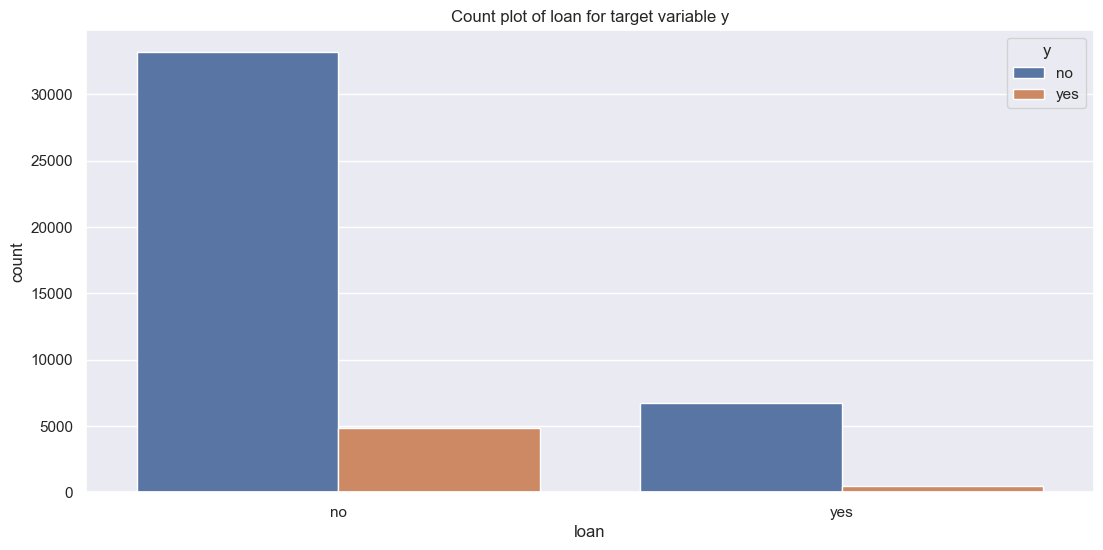

In [40]:
sns.countplot(x=data['loan'], data=data, hue=data['y'])
plt.title('Count plot of loan for target variable y')

In [41]:
data.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Text(0.5, 1.0, 'Count plot of contact for target variable y')

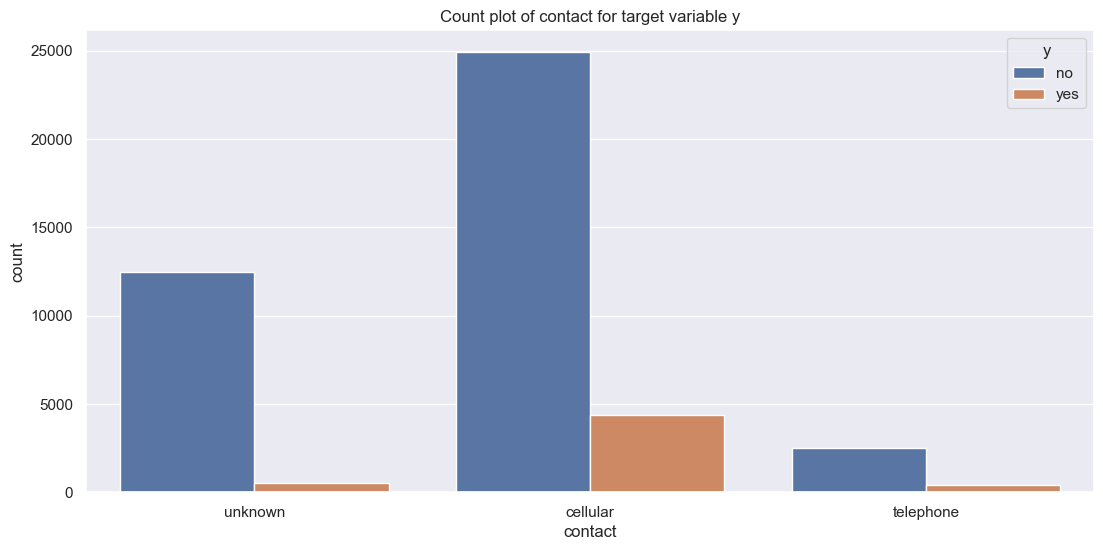

In [42]:
sns.countplot(x=data['contact'], data=data, hue=data['y'])
plt.title('Count plot of contact for target variable y')

In [43]:
data.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

Text(0.5, 1.0, 'Count plot of month for target variable y')

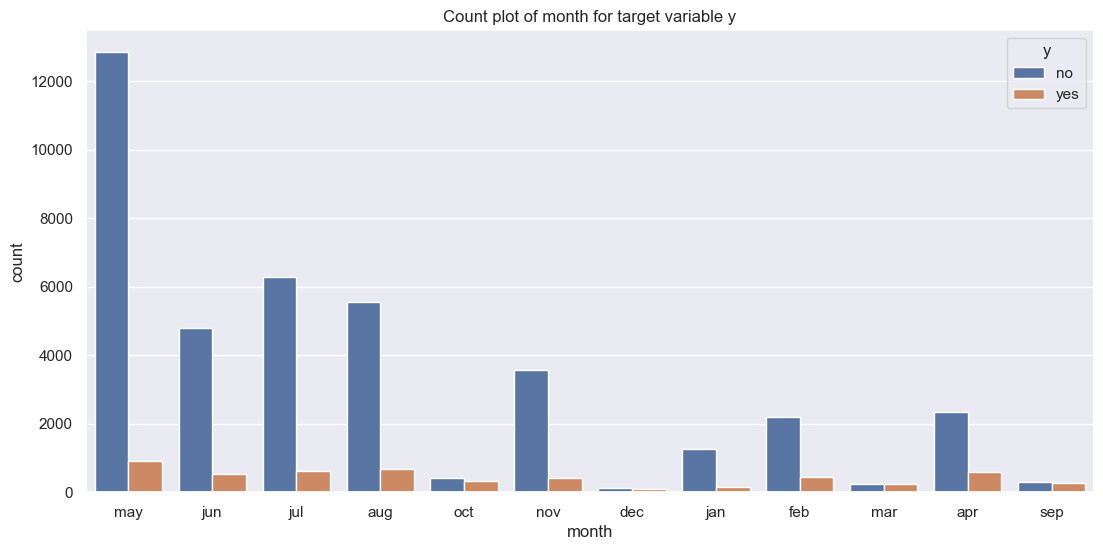

In [44]:
sns.countplot(x=data['month'], data=data, hue=data['y'])
plt.title('Count plot of month for target variable y')

In [45]:
data[data['month'] == 'jan'].y.value_counts()

no     1261
yes     142
Name: y, dtype: int64

In [46]:
print('Success rate and total clients contacted for different months:')
print('Clients contacted in January: {}, Success rate: {}'.format(len(data[data['month'] == 'jan']), data[data['month'] == 'jan'].y.value_counts()[1]/len(data[data['month'] == 'jan'])))
print('Clients contacted in February: {}, Success rate: {}'.format(len(data[data['month'] == 'feb']), data[data['month'] == 'feb'].y.value_counts()[1]/len(data[data['month'] == 'feb'])))
print('Clients contacted in March: {}, Success rate: {}'.format(len(data[data['month'] == 'mar']), data[data['month'] == 'mar'].y.value_counts()[1]/len(data[data['month'] == 'mar'])))
print('Clients contacted in April: {}, Success rate: {}'.format(len(data[data['month'] == 'apr']), data[data['month'] == 'apr'].y.value_counts()[1]/len(data[data['month'] == 'apr'])))
print('Clients contacted in May: {}, Success rate: {}'.format(len(data[data['month'] == 'may']), data[data['month'] == 'may'].y.value_counts()[1]/len(data[data['month'] == 'may'])))
print('Clients contacted in June: {}, Success rate: {}'.format(len(data[data['month'] == 'jun']), data[data['month'] == 'jun'].y.value_counts()[1]/len(data[data['month'] == 'jun'])))
print('Clients contacted in July: {}, Success rate: {}'.format(len(data[data['month'] == 'jul']), data[data['month'] == 'jul'].y.value_counts()[1]/len(data[data['month'] == 'jul'])))
print('Clients contacted in August: {}, Success rate: {}'.format(len(data[data['month'] == 'aug']), data[data['month'] == 'aug'].y.value_counts()[1]/len(data[data['month'] == 'aug'])))
print('Clients contacted in September: {}, Success rate: {}'.format(len(data[data['month'] == 'sep']), data[data['month'] == 'sep'].y.value_counts()[1]/len(data[data['month'] == 'sep'])))
print('Clients contacted in October: {}, Success rate: {}'.format(len(data[data['month'] == 'oct']), data[data['month'] == 'oct'].y.value_counts()[1]/len(data[data['month'] == 'oct'])))
print('Clients contacted in November: {}, Success rate: {}'.format(len(data[data['month'] == 'nov']), data[data['month'] == 'nov'].y.value_counts()[1]/len(data[data['month'] == 'nov'])))
print('Clients contacted in December: {}, Success rate: {}'.format(len(data[data['month'] == 'dec']), data[data['month'] == 'dec'].y.value_counts()[1]/len(data[data['month'] == 'dec'])))

Success rate and total clients contacted for different months:
Clients contacted in January: 1403, Success rate: 0.10121168923734854
Clients contacted in February: 2649, Success rate: 0.1664779161947905
Clients contacted in March: 477, Success rate: 0.480083857442348
Clients contacted in April: 2932, Success rate: 0.19679399727148705
Clients contacted in May: 13766, Success rate: 0.06719453726572715
Clients contacted in June: 5341, Success rate: 0.10222804718217562
Clients contacted in July: 6895, Success rate: 0.09093546047860769
Clients contacted in August: 6247, Success rate: 0.11013286377461182
Clients contacted in September: 579, Success rate: 0.46459412780656306
Clients contacted in October: 738, Success rate: 0.43766937669376693
Clients contacted in November: 3970, Success rate: 0.10151133501259446
Clients contacted in December: 214, Success rate: 0.4672897196261682


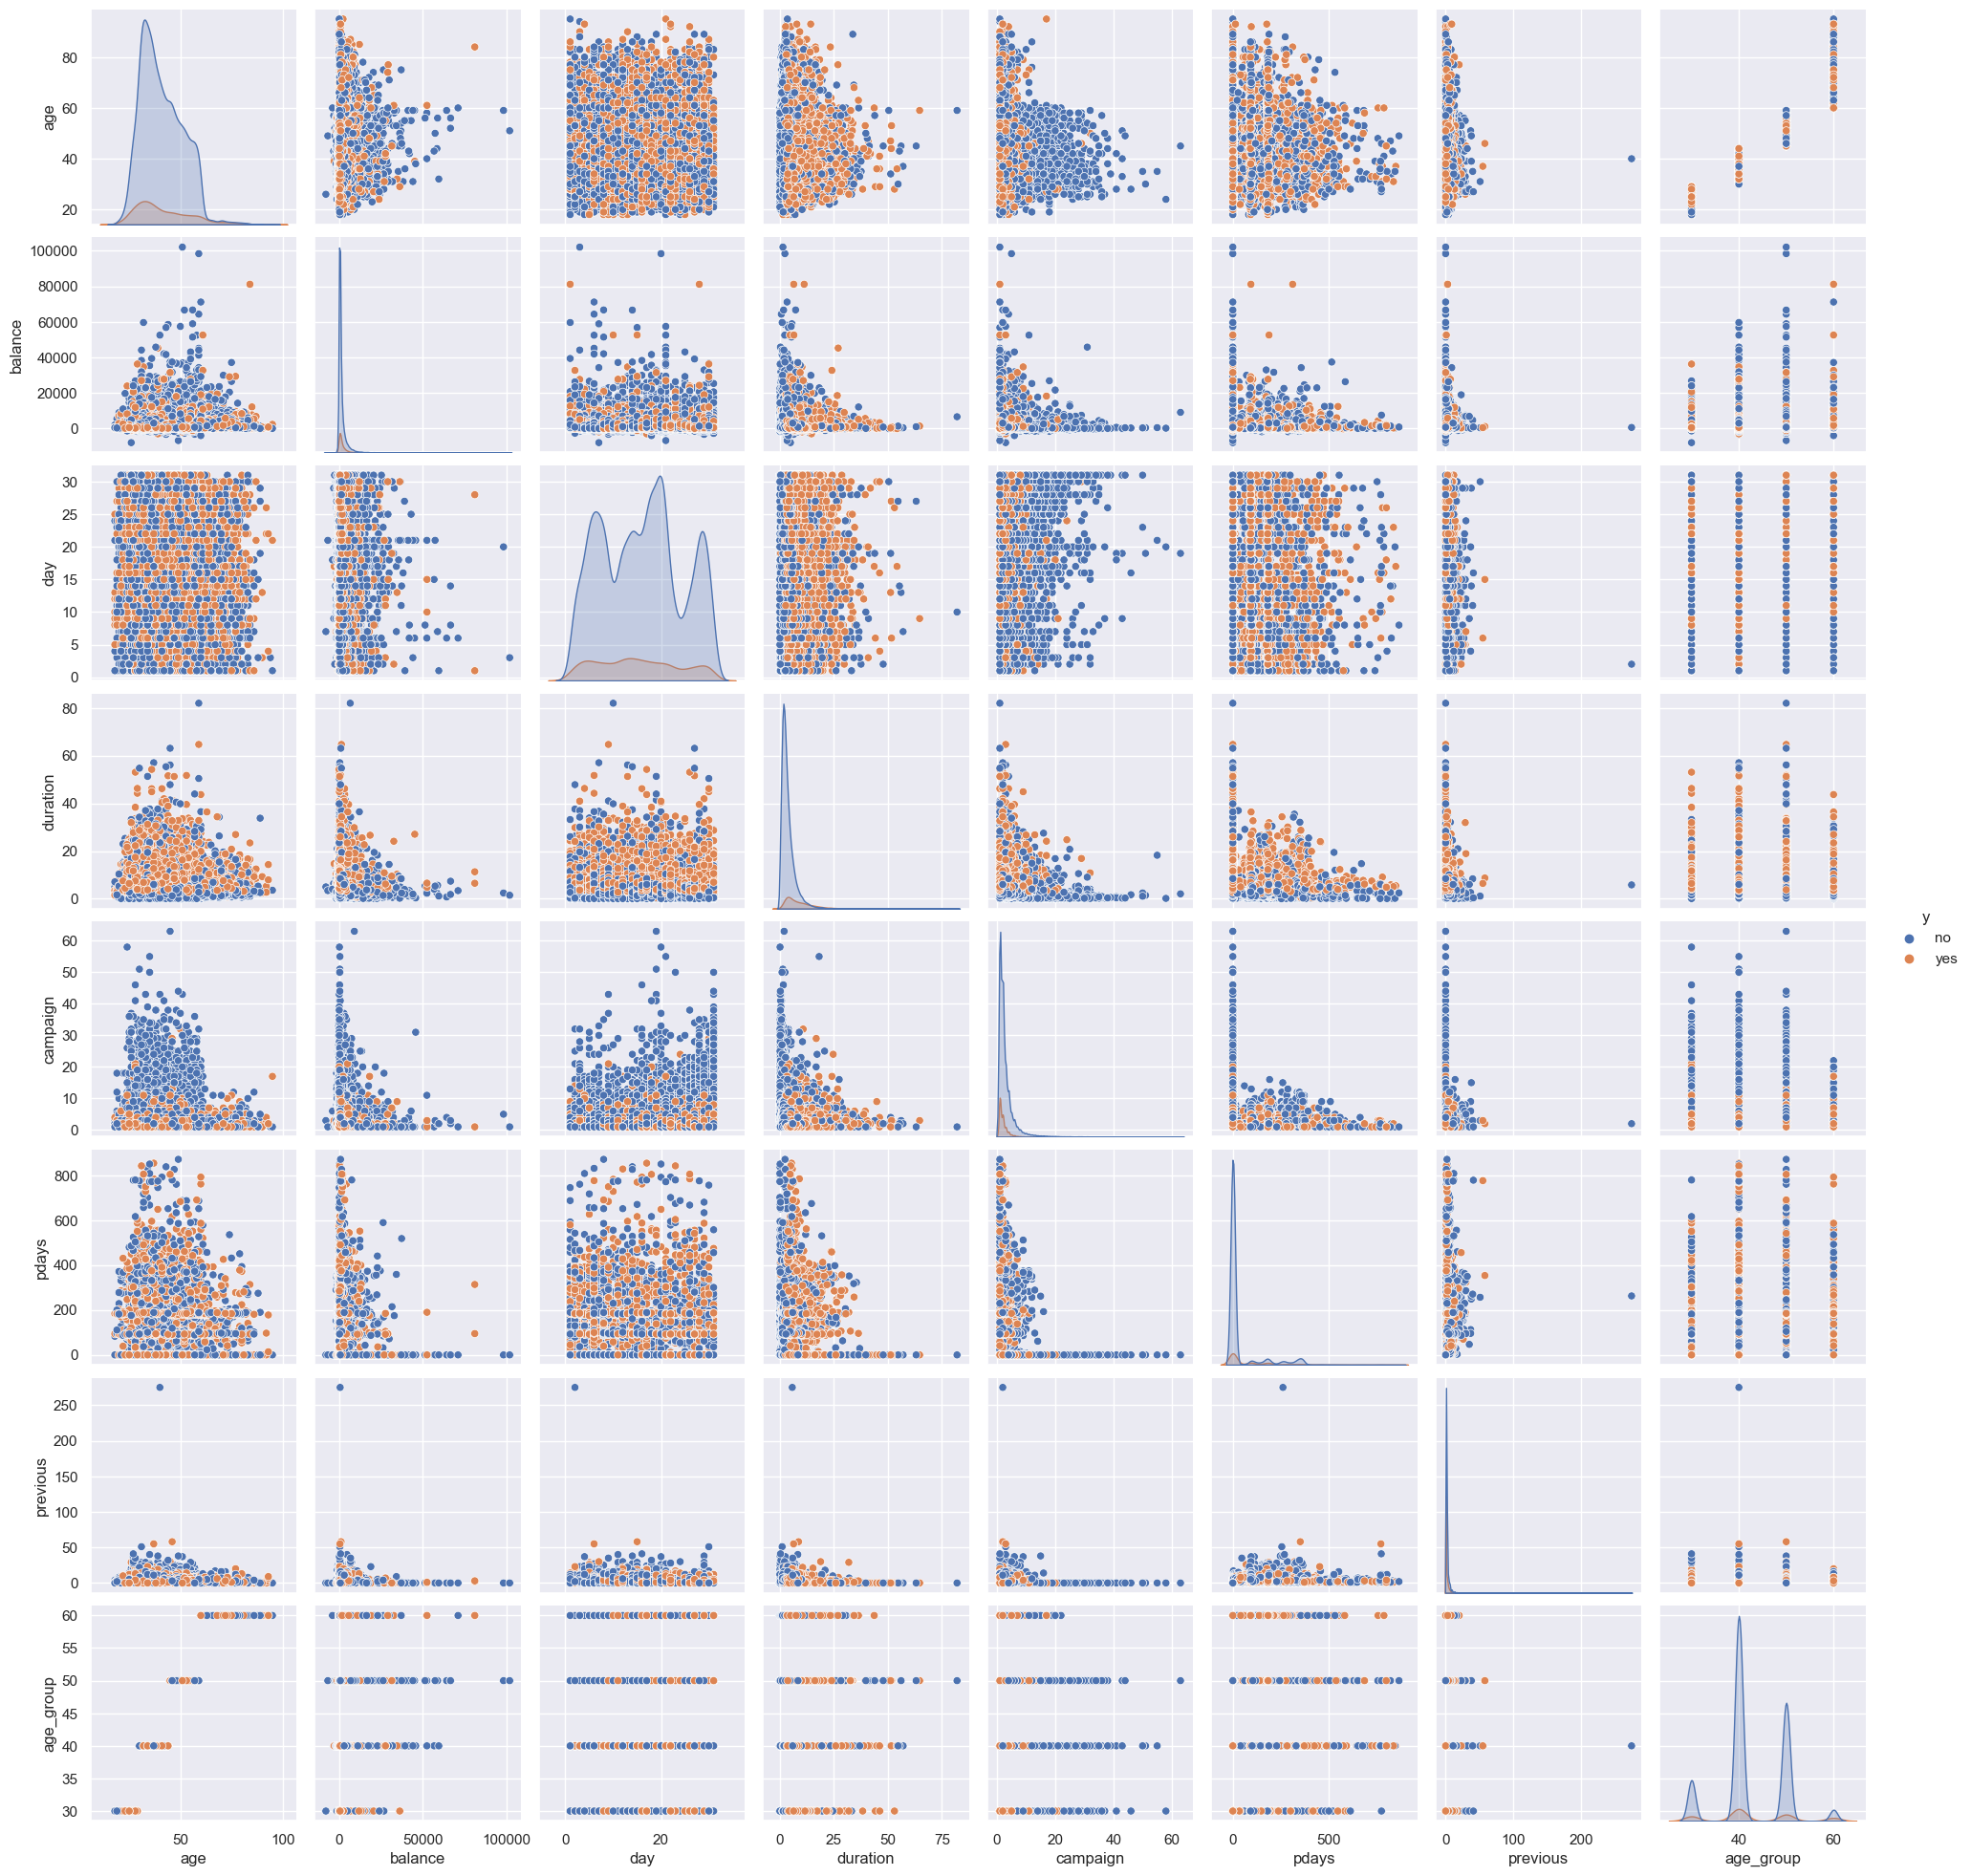

In [47]:
sns.pairplot(data, hue='y')

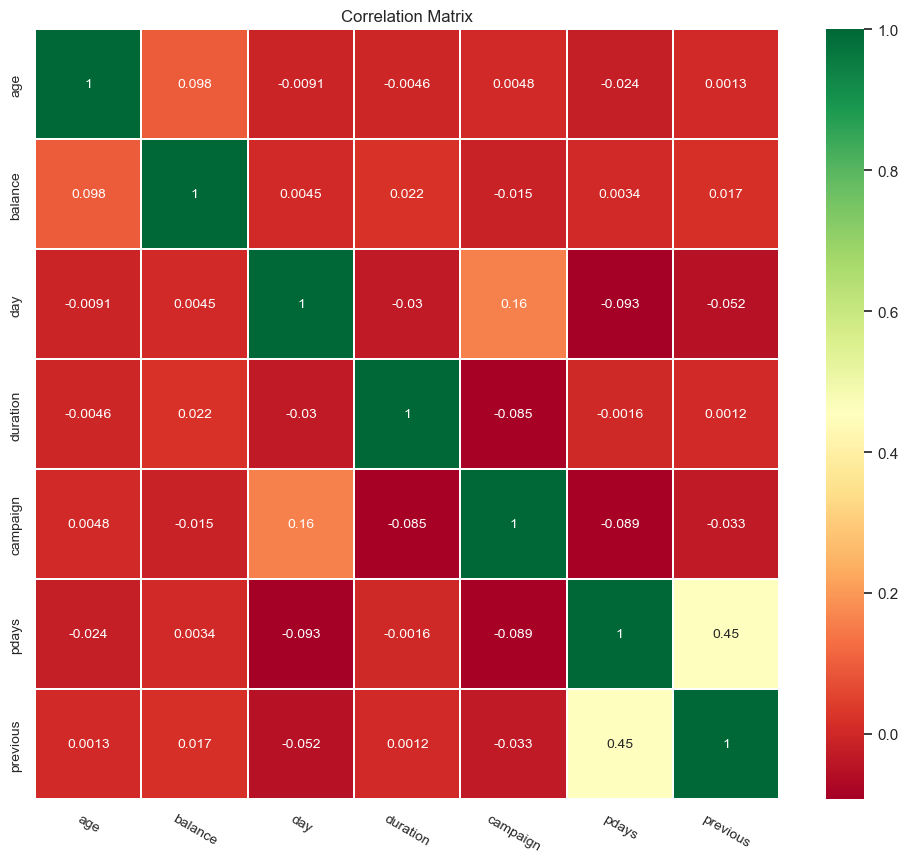

In [48]:
corr_data = data[numerical + ['y']]
corr = corr_data.corr()
plt.close()
cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [49]:
# creating new data frame of numerical columns 
data_numerical = data[numerical]
print('Shape of numerical dataframe {}'.format(data_numerical.shape))
data_numerical.head()

Shape of numerical dataframe (45211, 7)


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,4.350000,1,-1,0
1,44,29,5,2.516667,1,-1,0
2,33,2,5,1.266667,1,-1,0
3,47,1506,5,1.533333,1,-1,0
4,33,1,5,3.300000,1,-1,0


In [50]:
q3 = data_numerical.quantile(0.75)
q1 = data_numerical.quantile(0.25)
iqr = q3 - q1
print('IQR for numerical attributes')
print(iqr)

IQR for numerical attributes
age           15.0
balance     1356.0
day           13.0
duration       3.6
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [51]:
data_out = data[~((data_numerical < (q1 - 1.5 * iqr)) |(data_numerical > (q3 + 1.5 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(data.shape[0] - data_out.shape[0]))

17029 points are outliers based on IQR


In [52]:
data.shape

(45211, 18)

In [53]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.350000,1,-1,0,unknown,no,50.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.516667,1,-1,0,unknown,no,40.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.266667,1,-1,0,unknown,no,40.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.533333,1,-1,0,unknown,no,50.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.300000,1,-1,0,unknown,no,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,16.283333,3,-1,0,unknown,yes,50.0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,7.600000,2,-1,0,unknown,yes,60.0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,18.783333,5,184,3,success,yes,60.0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,8.466667,4,-1,0,unknown,no,50.0


In [54]:
# preprocessing

# Train Test Split

data.replace(to_replace={'y':'yes'}, value=1, inplace=True)
data.replace(to_replace={'y':'no'}, value=0, inplace=True)

In [55]:
# Convert the columns into categorical variables
data1 = data.copy()
data1['job'] = data1['job'].astype('category').cat.codes
data1['marital'] = data1['marital'].astype('category').cat.codes
data1['education'] = data1['education'].astype('category').cat.codes
data1['contact'] = data1['contact'].astype('category').cat.codes
data1['poutcome'] = data1['poutcome'].astype('category').cat.codes
data1['month'] = data1['month'].astype('category').cat.codes
data1['default'] = data1['default'].astype('category').cat.codes
data1['loan'] = data1['loan'].astype('category').cat.codes
data1['housing'] = data1['housing'].astype('category').cat.codes

In [56]:
y = data1['y']
x_train, x_test, y_train, y_test = train_test_split(data1.drop(['y'], axis=1), y, test_size=0.20, random_state=42)

In [57]:
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))
print('Test data shape {} {}'.format(x_test.shape, y_test.shape))

Train data shape (36168, 17) (36168,)
Test data shape (9043, 17) (9043,)


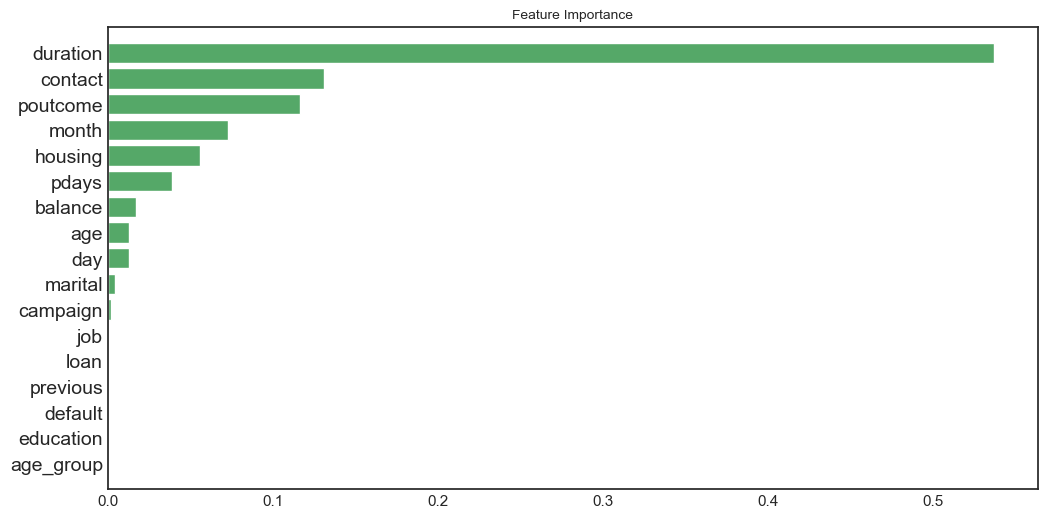

In [58]:
# Feature importance

plt.style.use('seaborn-white')
clf = DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf = 0.01)
clf.fit(x_train, y_train)
importances = clf.feature_importances_
feature_names = data.drop('y', axis=1).columns
indices = np.argsort(importances)
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Feature Importance", fontsize=10)
    plt.barh(range(len(indices)), importances[indices], color='g',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
feature_importance_graph(indices, importances, feature_names)
plt.show()


In [59]:
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(data.drop(['y'], axis=1), y, test_size=0.20, random_state=42)

In [60]:
#Encoding data
#Encoding categories
vectorizer = CountVectorizer(vocabulary=x_train.poutcome.unique())
x_train_poutcome = vectorizer.fit_transform(x_train.poutcome)
x_test_poutcome = vectorizer.transform(x_test.poutcome)

In [61]:
vectorizer = CountVectorizer(vocabulary=x_train.contact.unique())
x_train_contact = vectorizer.fit_transform(x_train.contact)
x_test_contact = vectorizer.transform(x_test.contact)

In [62]:
vectorizer = CountVectorizer(vocabulary=x_train.month.unique())
x_train_month = vectorizer.fit_transform(x_train.month)
x_test_month = vectorizer.transform(x_test.month)

In [63]:
vectorizer = CountVectorizer(vocabulary=x_train.housing.unique())
x_train_housing = vectorizer.fit_transform(x_train.housing)
x_test_housing = vectorizer.transform(x_test.housing)

In [64]:
#Encoding Numerical data using Normalizer()

vectorizer = Normalizer()
x_train_duration = vectorizer.fit_transform(x_train['duration'].values.reshape(-1, 1))
x_test_duration = vectorizer.transform(x_test['duration'].values.reshape(-1, 1))


In [65]:
vectorizer = Normalizer()
x_train_pdays = vectorizer.fit_transform(x_train['pdays'].values.reshape(-1, 1))
x_test_pdays = vectorizer.transform(x_test['pdays'].values.reshape(-1, 1))


In [66]:

vectorizer = Normalizer()
x_train_age = vectorizer.fit_transform(x_train['age'].values.reshape(-1, 1))
x_test_age = vectorizer.transform(x_test['age'].values.reshape(-1, 1))


In [67]:
vectorizer = Normalizer()
x_train_balance = vectorizer.fit_transform(x_train['balance'].values.reshape(-1,1))
x_test_balance = vectorizer.transform(x_test['balance'].values.reshape(-1, 1))

In [68]:
from scipy.sparse import hstack

train = hstack((x_train_contact, x_train_poutcome, x_train_month, x_train_housing, x_train_duration, x_train_pdays, x_train_age, x_train_balance)).tocsr()

test = hstack((x_test_contact, x_test_poutcome, x_test_month, x_test_housing, x_test_duration, x_test_pdays, x_test_age, x_test_balance)).tocsr()

In [69]:
#MACHINE LEARNING MODELS

In [70]:
# dictionary to store accuracy and roc score for each model
score = {}

In [71]:
#LOGISTIC REGRESSION
#HYPERMETER TUNING LOGISTIC REGRESSION
parameters = {'C':[(10**i)*x for i in range(-4, 1) for x in [1,3,5]]}

model = LogisticRegression(class_weight='balanced')
clf = RandomizedSearchCV(model, parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'C': 0.1}
Best score: 0.7564790152642358


**************************************************
Train AUC: 0.757
Test AUC: 0.739
**************************************************
Train Accuracy: 0.748
Test Accuracy: 0.742


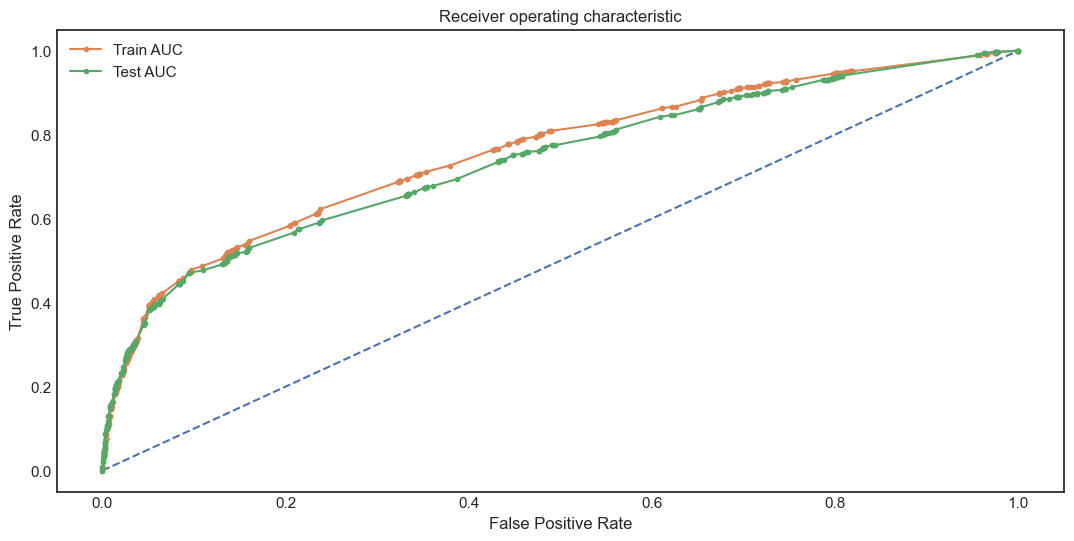

In [72]:
# TRAINING LOGISTIC REGRESSION WITH BEST HYPERPARAMETER

from sklearn.metrics import log_loss

model = LogisticRegression(C=3, class_weight='balanced', n_jobs=-1)
model.fit(train, y_train)
y_probs_train = model.predict_proba(train)
y_probs_test = model.predict_proba(test)
y_predicted_train = model.predict(train)
y_predicted_test = model.predict(test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Logistic Regression'] = [test_auc, test_acc]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.show()


Confusion matrix:
 [[24464  7506]
 [ 1625  2573]]


<AxesSubplot:>

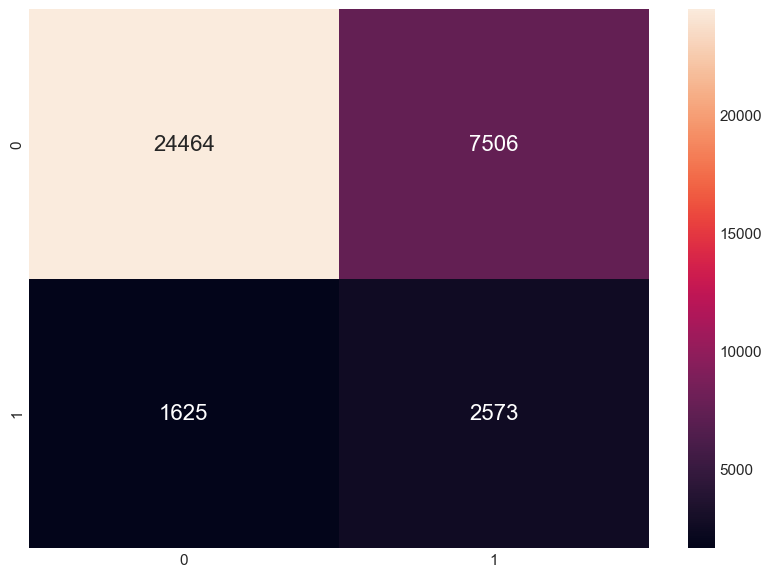

In [73]:
# TRAIN CONFUSION MATRIX

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_train, y_predicted_train)
print('Confusion matrix:\n', cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrix:
 [[6065 1887]
 [ 446  645]]


<AxesSubplot:>

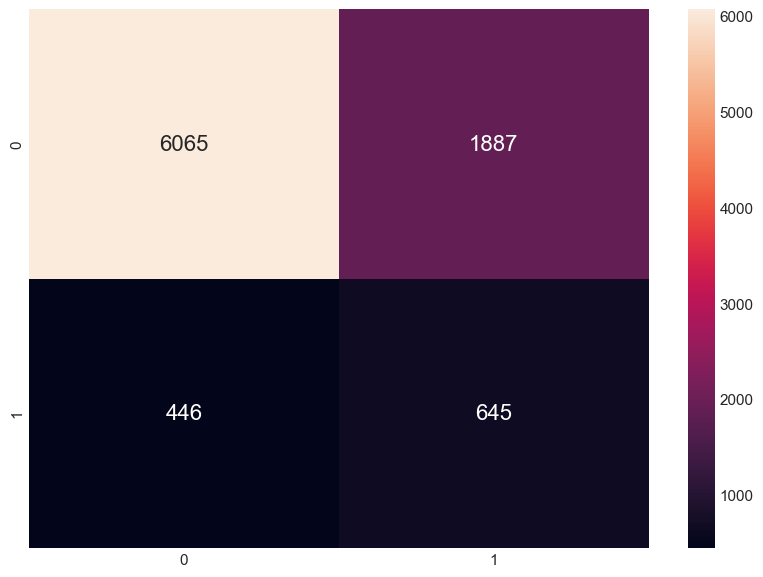

In [74]:
# TEST CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_test, y_predicted_test)
print('Confusion matrix:\n', cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [75]:
# RANDOM FOREST
# HYPER PARAMETER TUNING RANDOM FOREST

params = {'n_estimators':[75, 100, 250, 500], 'max_depth':[3, 5, 10, 15, 25]}
model = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'n_estimators': 500, 'max_depth': 10}
Best score: 0.7685323609722443


**************************************************
Train AUC: 0.786
Test AUC: 0.748
**************************************************
Train Accuracy: 0.846
Test Accuracy: 0.840


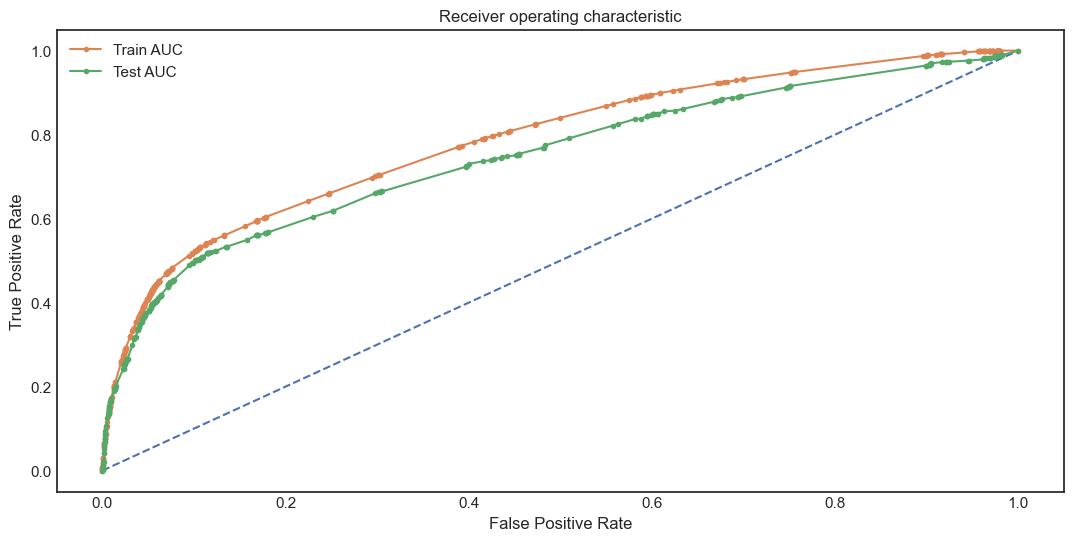

In [76]:
# TRAINING RANDOM FOREST WITH BEST HYPER PARAMETER
model = RandomForestClassifier(n_estimators=250, max_depth=25, class_weight='balanced', n_jobs=-1)
model.fit(train, y_train)
y_probs_train = model.predict_proba(train)
y_probs_test = model.predict_proba(test)
y_predicted_train = model.predict(train)
y_predicted_test = model.predict(test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Random Forest'] = [test_auc, test_acc]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.show()

Confusion matrix:
 [[28342  3628]
 [ 1928  2270]]


<AxesSubplot:>

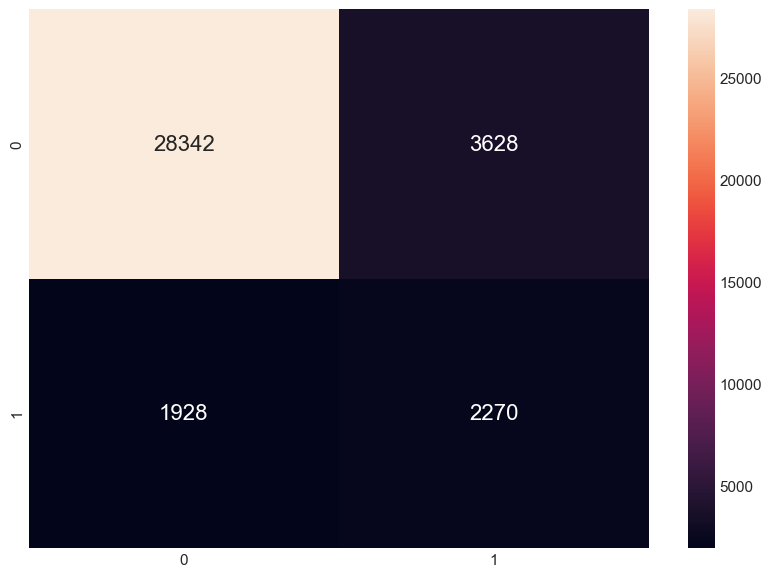

In [77]:
#TRAIN CONFUSION MATRIX

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_train, y_predicted_train)
print('Confusion matrix:\n', cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrix:
 [[7033  919]
 [ 525  566]]


<AxesSubplot:>

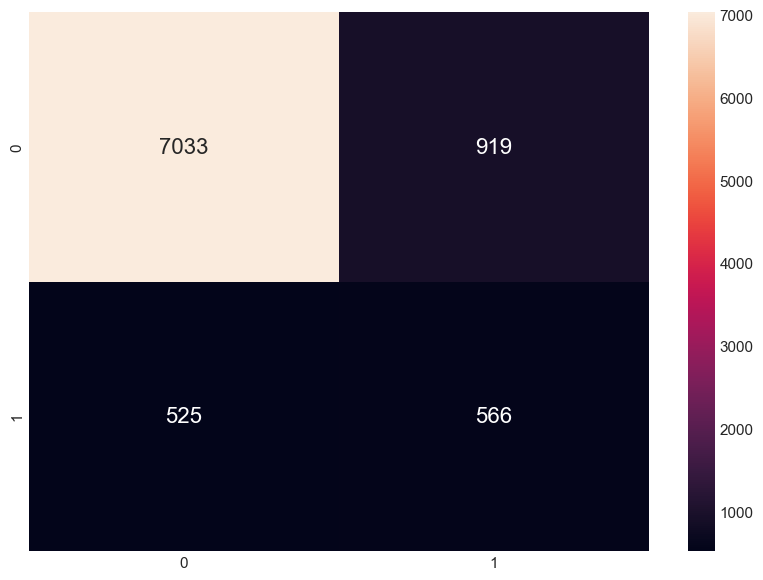

In [78]:
#TEST CONFUSION MATRIX

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_test, y_predicted_test)
print('Confusion matrix:\n', cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [79]:
# SVM

# HYPERPARAMETER TUNING SVM

params = {'alpha': [10**i for i in range(-4, 5)]}

model = SGDClassifier(class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'alpha': 0.01}
Best score: 0.7452641485594459


**************************************************
Train AUC: 0.746
Test AUC: 0.734
**************************************************
Train Accuracy: 0.829
Test Accuracy: 0.823


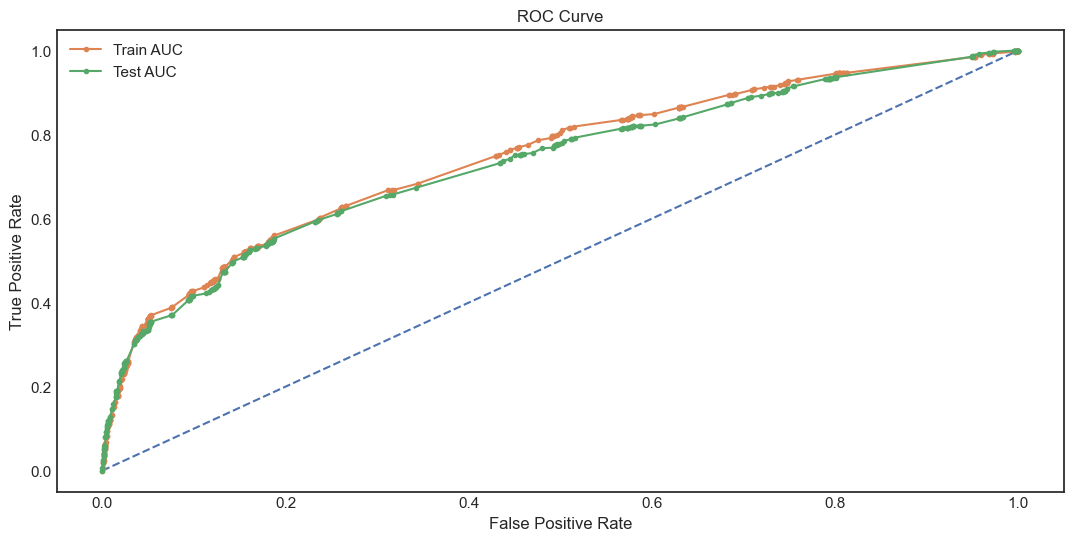

In [80]:
# TRAINING SVM WITH BEST HYPERPARAMETERS

model = SGDClassifier(alpha=0.0001, class_weight='balanced', n_jobs=-1)
model.fit(train, y_train)
y_probs_train = model.decision_function(train)
y_probs_test = model.decision_function(test)
y_predicted_train = model.predict(train)
y_predicted_test = model.predict(test)

# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['SVM'] = [test_auc, test_acc]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

Confusion matrix:
 [[28085  3885]
 [ 2296  1902]]


<AxesSubplot:>

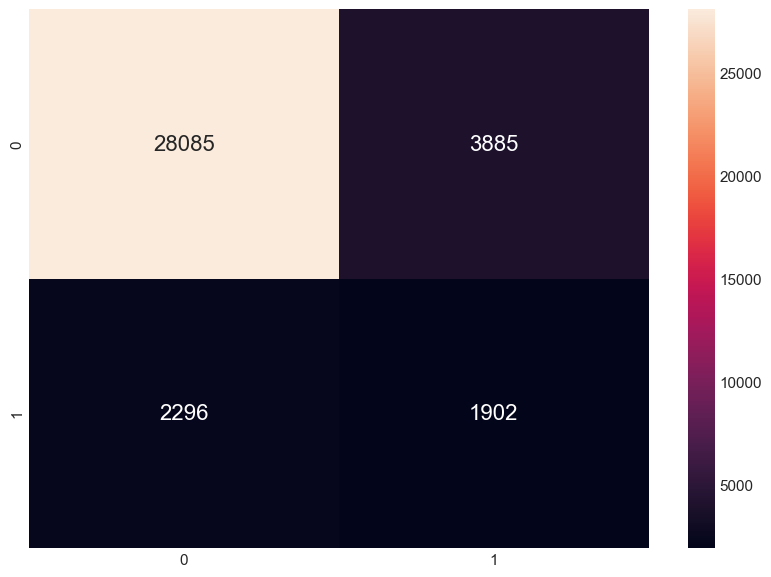

In [81]:
# TRAIN CONFUSION MATRIX

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_train, y_predicted_train)
print('Confusion matrix:\n', cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Confusion matrix:
 [[6971  981]
 [ 616  475]]


<AxesSubplot:>

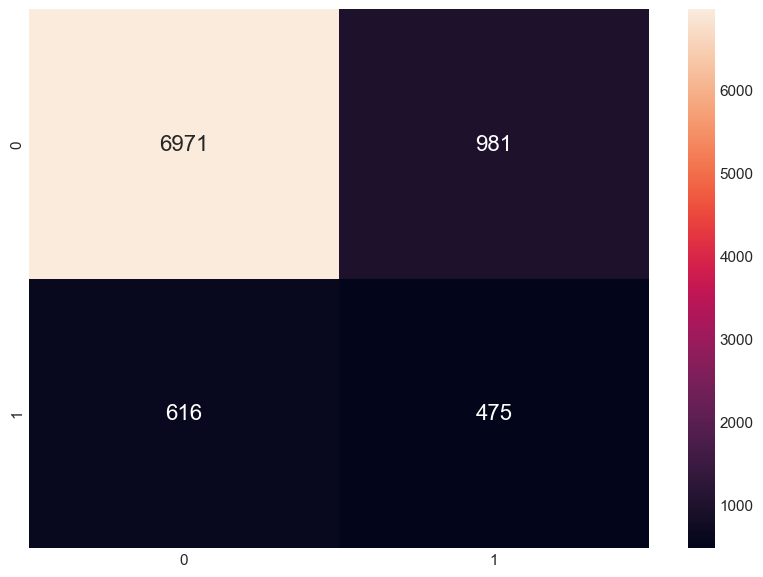

In [82]:
# TEST CONFUSION MATRIX

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_test, y_predicted_test)
print('Confusion matrix:\n', cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [83]:
print('***************  Comparison of different models  ****************')
table = PrettyTable(['Model', 'Model AUC', 'Model Accuracy'])
for item in score.items():
    table.add_row([item[0], item[1][0], item[1][1]])
print(table)

***************  Comparison of different models  ****************
+---------------------+--------------------+--------------------+
|        Model        |     Model AUC      |   Model Accuracy   |
+---------------------+--------------------+--------------------+
| Logistic Regression | 0.7388685919365875 | 0.7420103947804932 |
|    Random Forest    | 0.7484444360941083 | 0.8403184783810682 |
|         SVM         | 0.7337381299713958 | 0.8233993143868186 |
+---------------------+--------------------+--------------------+
